In [120]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
%matplotlib inline
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')


from sklearn.metrics import make_scorer

# 시계열

from datetime import datetime as dt
from statsmodels.tsa.arima_model import ARIMA
from dateutil.relativedelta import relativedelta
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing
import statsmodels.api as sm


from sklearn.metrics import mean_absolute_error, mean_squared_error

data_dir='C:/Users/kdh2/BIGCON/data/total'
data_list = os.listdir(data_dir)


#항목별 저장
data_list_single_hitter = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('개인타자')]
data_single_hitter = [pd.read_csv(os.path.join(data_dir, data_list_single_hitter[x]), encoding='cp949') for x in range(len(data_list_single_hitter))]
data_list_single_pitcher = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('개인투수')]
data_single_pitcher = [pd.read_csv(os.path.join(data_dir, data_list_single_pitcher[x]), encoding='cp949') for x in range(len(data_list_single_pitcher))]
data_list_games = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('경기')]
data_games = [pd.read_csv(os.path.join(data_dir, data_list_games[x]), encoding='cp949') for x in range(len(data_list_games))]
data_list_player_enroll = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('등록선수')]
data_player_enroll = [pd.read_csv(os.path.join(data_dir, data_list_player_enroll[x]), encoding='cp949') for x in range(len(data_list_player_enroll))]
data_list_players = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('선수')]
data_players = [pd.read_csv(os.path.join(data_dir, data_list_players[x]), encoding='cp949') for x in range(len(data_list_players))]
data_list_teams = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('팀')]
data_teams = [pd.read_csv(os.path.join(data_dir, data_list_teams[x]), encoding='cp949') for x in range(len(data_list_teams))]
data_list_team_hitter = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('팀타자')]
data_team_hitter = [pd.read_csv(os.path.join(data_dir, data_list_team_hitter[x]), encoding='cp949') for x in range(len(data_list_team_hitter))]
data_list_team_pitcher = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('팀투수')]
data_team_pitcher = [pd.read_csv(os.path.join(data_dir, data_list_team_pitcher[x]), encoding='cp949') for x in range(len(data_list_team_pitcher))]


team=pd.concat(data_team_hitter,axis=0)
for i in range(0,5):
     data_team_hitter[i]['AVG']=data_team_hitter[i]['HIT']/data_team_hitter[i]['AB']

team.columns

from datetime import datetime as dt
from dateutil.parser import parse
team_2016=data_team_hitter[0]
team_2017=data_team_hitter[1]
team_2018=data_team_hitter[2]
team_2019=data_team_hitter[3]
team_2020=data_team_hitter[4]
df_list=[team,team_2016,team_2017,team_2018,team_2019,team_2020]
for i in df_list:
    i['y']=i['HIT']/i['AB']
    
    i['ds']=pd.to_datetime(i['G_ID'].apply(lambda x: parse(str(x[:8])+str(x[12:])+'00000',yearfirst=True)),errors='raise')
    i['H1']=i['HIT']-i['H2']-i['H3']-i['HR']
    

team_SK=team[team['T_ID']=='SK']
team_HH=team[team['T_ID']=='HH']

In [121]:
team_SK.iloc[:,4:].drop(['ds','TB_SC'],axis=1)

,HEADER_NO,PA,AB,RBI,RUN,HIT,H2,H3,HR,SB,...,HP,KK,GD,ERR,LOB,P_HRA_RT,P_AB_CN,P_HIT_CN,y,H1
4,0,36,36,4,4,10,5,0,1,0,...,0,7,1,1,5,0.375000,8,3,0.277778,4
14,0,44,37,4,4,10,2,0,1,2,...,1,6,1,1,12,0.111111,9,1,0.270270,7
20,0,38,32,4,4,8,2,0,0,1,...,2,4,0,0,7,0.125000,8,1,0.250000,6
29,0,35,30,1,1,4,2,0,0,1,...,2,12,0,1,7,0.142857,7,1,0.133333,2
37,0,21,16,1,1,1,0,0,0,0,...,1,2,1,1,5,0.250000,4,1,0.062500,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,0,37,35,2,2,10,0,0,0,1,...,0,10,0,1,8,0.333333,6,2,0.285714,10
609,0,37,34,2,2,7,0,0,1,5,...,0,6,2,1,8,0.000000,8,0,0.205882,6
618,0,43,35,11,12,13,2,0,2,0,...,0,7,0,0,7,0.461538,13,6,0.371429,9
628,0,34,32,1,1,5,0,0,1,0,...,0,8,0,0,6,0.000000,2,0,0.156250,4


In [122]:
from statsmodels.tsa.stattools import adfuller

In [123]:
team_HH=team_HH.set_index('ds')

In [124]:
team_HH

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,PA,AB,RBI,RUN,...,HP,KK,GD,ERR,LOB,P_HRA_RT,P_AB_CN,P_HIT_CN,y,H1
ds,,,,,,,,,,,,,,,,,,,,,
2016-04-01,20160401HHLG0,20160401,HH,LG,0,T,52,46,4,4,...,0,10,1,2,12,0.200000,15,3,0.282609,11
2016-04-02,20160402HHLG0,20160402,HH,LG,0,T,50,43,7,7,...,2,9,0,1,10,0.333333,15,5,0.302326,9
2016-04-05,20160405WOHH0,20160405,HH,WO,0,B,41,35,8,9,...,1,1,1,1,8,0.428571,14,6,0.371429,9
2016-04-06,20160406WOHH0,20160406,HH,WO,0,B,36,35,4,4,...,0,5,1,0,5,0.222222,9,2,0.314286,6
2016-04-07,20160407WOHH0,20160407,HH,WO,0,B,40,39,3,3,...,1,10,0,1,10,0.181818,11,2,0.307692,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-15,20200715HHKT0,20200715,HH,KT,0,T,43,38,6,7,...,0,7,0,0,9,0.307692,13,4,0.289474,10
2020-07-16,20200716HHKT0,20200716,HH,KT,0,T,32,32,1,1,...,0,8,0,0,4,0.000000,2,0,0.187500,6
2020-07-17,20200717HHLG0,20200717,HH,LG,0,T,32,29,0,0,...,0,9,1,1,5,0.000000,6,0,0.103448,2


In [125]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [126]:
grangers_causation_matrix(team_HH,team_HH.iloc[:,4:].drop(['TB_SC'],axis=1).columns)

,HEADER_NO_x,PA_x,AB_x,RBI_x,RUN_x,HIT_x,H2_x,H3_x,HR_x,SB_x,...,HP_x,KK_x,GD_x,ERR_x,LOB_x,P_HRA_RT_x,P_AB_CN_x,P_HIT_CN_x,y_x,H1_x
HEADER_NO_y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PA_y,1.0,1.0000,0.1670,0.2379,0.3661,0.5401,0.4927,0.0586,0.5872,0.0142,...,0.3828,0.0395,0.6455,0.1375,0.5203,0.5347,0.5265,0.5317,0.7207,0.3618
AB_y,1.0,0.3646,1.0000,0.0659,0.1183,0.2746,0.3367,0.0138,0.5048,0.1099,...,0.1731,0.0313,0.6304,0.3429,0.8288,0.2742,0.1279,0.1635,0.2803,0.5054
RBI_y,1.0,0.7670,0.4796,1.0000,0.0111,0.1883,0.4013,0.3687,0.5813,0.1282,...,0.4188,0.0214,0.3663,0.0694,0.1700,0.2520,0.7998,0.1921,0.1118,0.2284
RUN_y,1.0,0.7587,0.3790,0.0136,1.0000,0.2722,0.4344,0.4429,0.5830,0.1111,...,0.5459,0.0233,0.2572,0.0537,0.2055,0.0787,0.8190,0.0926,0.1825,0.2574
HIT_y,1.0,0.2171,0.5418,0.1269,0.1887,1.0000,0.4152,0.0106,0.2121,0.0688,...,0.1537,0.0355,0.3012,0.0509,0.3808,0.0758,0.3492,0.0406,0.5348,0.1962
H2_y,1.0,0.0609,0.2385,0.0457,0.0540,0.1839,1.0000,0.0855,0.0830,0.4443,...,0.2300,0.0182,0.2437,0.1252,0.2114,0.1739,0.5274,0.0901,0.1930,0.4754
H3_y,1.0,0.0399,0.0795,0.1258,0.1462,0.0891,0.0009,1.0000,0.1523,0.4585,...,0.7306,0.2851,0.1634,0.0444,0.1291,0.4538,0.1100,0.3611,0.1208,0.4273
HR_y,1.0,0.5705,0.1892,0.1320,0.2026,0.6349,0.1247,0.2292,1.0000,0.9111,...,0.2663,0.5293,0.4798,0.5616,0.1877,0.1757,0.4866,0.2194,0.5776,0.4604
SB_y,1.0,0.1168,0.2895,0.1482,0.1595,0.2282,0.5503,0.4782,0.2141,1.0000,...,0.2290,0.8639,0.2453,0.1099,0.3304,0.0832,0.2580,0.0858,0.3765,0.2101


In [127]:
#RBI ,H3,P_HRA_RT,P_HIT_CN_x under p value 0.05

In [128]:
# 공적분
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

In [129]:
#인과관계 있는 애들만 공적분 검정
cointegration_test(team_HH[['y','RBI' ,'H3','P_HRA_RT','P_HIT_CN']])

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
y      ::  362.19    > 60.0627   =>   True
RBI    ::  243.18    > 40.1749   =>   True
H3     ::  144.47    > 24.2761   =>   True
P_HRA_RT ::  64.48     > 12.3212   =>   True
P_HIT_CN ::  0.9       > 4.1296    =>   False


In [130]:
#train_test split
team_HH=team_HH[['y','RBI' ,'H3','P_HRA_RT','P_HIT_CN']]
nobs = 20
df_train, df_test = team_HH[0:-nobs], team_HH[-nobs:]
print(df_train.shape)  # (119, 8)
print(df_test.shape)  # (4, 8)

(621, 5)
(20, 5)


In [131]:
#stationary
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")  

In [132]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "y" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -25.0727
 No. Lags Chosen       = 0
 Critical value 1%     = -3.441
 Critical value 5%     = -2.866
 Critical value 10%    = -2.569
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "RBI" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -15.9176
 No. Lags Chosen       = 1
 Critical value 1%     = -3.441
 Critical value 5%     = -2.866
 Critical value 10%    = -2.569
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "H3" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Tes

In [133]:
#selecting Order(p)
#iteratively fit increasing orders of VAR model and pick the order that gives a model with least AIC.
model =sm.tsa.VAR(df_train)
for i in [60,61,62,63,64,65,66,67,68]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')
    #lag=66에서 AIC가 최소군요
    

Lag Order = 60
AIC :  -8.30716122814719
BIC :  3.3082219497702017
FPE :  0.0004621080014929853
HQIC:  -3.772007939854241 

Lag Order = 61
AIC :  -8.335172695045834
BIC :  3.489368874785715
FPE :  0.0004681577708710447
HQIC:  -3.717992023816368 

Lag Order = 62
AIC :  -8.32009015310964
BIC :  3.714189687241305
FPE :  0.0004963277382370691
HQIC:  -3.6206422965933207 

Lag Order = 63
AIC :  -8.286187170642986
BIC :  3.958413475526317
FPE :  0.0005375136728504313
HQIC:  -3.504231206998515 

Lag Order = 64
AIC :  -8.26836719220491
BIC :  4.187139468626851
FPE :  0.000574328280921014
HQIC:  -3.4036610729536907 

Lag Order = 65
AIC :  -8.315336658793385
BIC :  4.351663916077927
FPE :  0.0005767611804169325
HQIC:  -3.3676372016153593 

Lag Order = 66
AIC :  -8.300595081341005
BIC :  4.578490014605569
FPE :  0.0006178872555377101
HQIC:  -3.2696579628121114 

Lag Order = 67
AIC :  -8.303905339030841
BIC :  4.787857609950091
FPE :  0.0006521373955910375
HQIC:  -3.189485087301513 

Lag Order = 68


In [134]:
model_fitted = model.fit(66)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 09, Sep, 2020
Time:                     21:52:18
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    4.57849
Nobs:                     555.000    HQIC:                  -3.26966
Log likelihood:           20.8607    FPE:                0.000617887
AIC:                     -8.30060    Det(Omega_mle):     5.95944e-05
--------------------------------------------------------------------
Results for equation y
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.051341         0.096822            0.530           0.596
L1.y                -0.155340         0.107760           -1.442           0.149
L1.RBI               0.001432         0.003031            0.472     

In [135]:
#checking serail correlation of residuals using 더빈왓슨
#Serial correlation of residuals is used to check if there is any leftover pattern in the residuals (errors).
#it is to the value 2, then there is no significant serial correlation
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df_train.columns, out):
    print(col, ':', round(val, 2))

y : 2.0
RBI : 1.99
H3 : 2.0
P_HRA_RT : 2.0
P_HIT_CN : 1.99


In [136]:
lag_order = model_fitted.k_ar
print(lag_order)

66


In [137]:
# Input data for forecasting
forecast_input = df_train.values[-lag_order:]


In [138]:
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=team_HH.index[-nobs:], columns=team_HH.columns)
df_forecast

,y,RBI,H3,P_HRA_RT,P_HIT_CN
ds,,,,,
2020-06-26,0.374644,4.785573,-0.070441,0.114001,4.301010
2020-06-27,0.125740,4.615585,-0.136829,0.332992,2.866789
2020-06-28,0.119211,0.968662,0.804752,0.292669,1.095571
2020-07-01,0.415242,10.355458,0.490152,0.219318,5.851584
2020-07-02,0.206071,4.827403,-0.020743,0.052746,0.531713
2020-07-03,0.225166,0.875282,0.070725,0.119459,0.348198
2020-07-04,0.248680,3.342178,-0.045993,0.194606,3.380597
2020-07-05,0.060898,0.510260,0.158486,0.082072,0.061473
2020-07-07,0.156369,-0.941569,0.548767,0.222936,1.185744


In [139]:
# Plot of Forecast vs Actuals


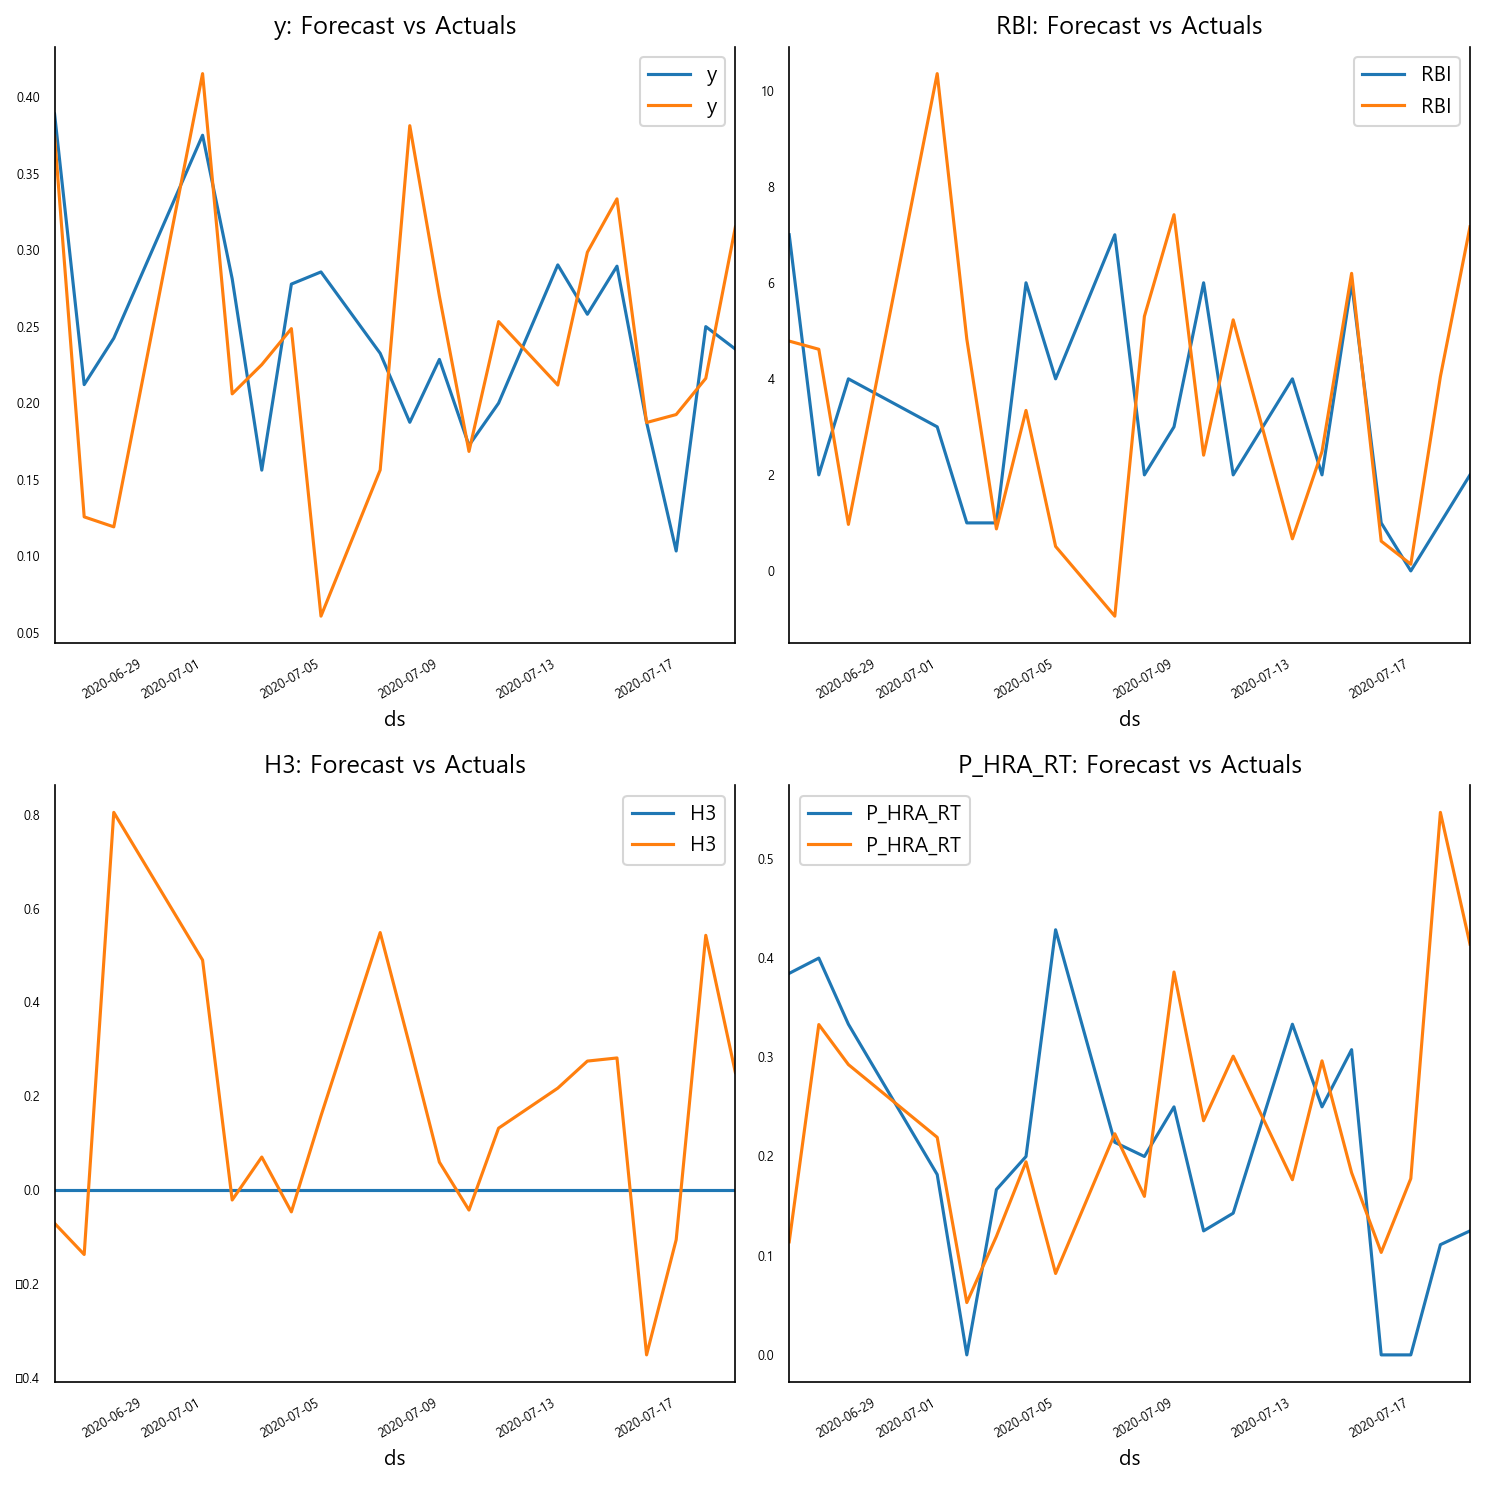

In [146]:
fig, axes = plt.subplots(nrows=int(len(team_HH.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(team_HH.columns, axes.flatten())):
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    df_forecast[col].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
     
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout()

In [149]:
mean_absolute_error(df_test['y'],df_forecast['y'])

0.0698186598239252